<a href="https://colab.research.google.com/github/samir1120k/Machine-Learning-Project/blob/IPL-Score-Prediction/IPL_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
import keras

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/ipl_data.csv')
data.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [54]:
data.isnull().sum()

,0
mid,0
date,0
venue,0
bat_team,0
bowl_team,0
batsman,0
bowler,0
runs,0
wickets,0
overs,0


**remove unimportant feature**

In [55]:
new_data=data.drop(['date','runs','wickets','runs','runs_last_5','mid','striker','non-striker','overs','wickets_last_5'],axis=1)

In [56]:
new_data.head(5)

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [57]:
x=new_data.drop('total',axis=1)
y=new_data['total']

In [58]:
from sklearn.preprocessing import LabelEncoder

venue_Encode=LabelEncoder()
bat_team_Encode=LabelEncoder()
bowl_team_Encode=LabelEncoder()
batsman_Encode=LabelEncoder()
bowler_Encode=LabelEncoder()

x['venue']=venue_Encode.fit_transform(x['venue'])
x['bat_team']=bat_team_Encode.fit_transform(x['bat_team'])
x['bowl_team']=bowl_team_Encode.fit_transform(x['bowl_team'])
x['batsman']=batsman_Encode.fit_transform(x['batsman'])
x['bowler']=bowler_Encode.fit_transform(x['bowler'])


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [61]:
model=keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(216,activation='relu'),
    keras.layers.Dense(1,activation='linear')
])
HuberLoss=tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam',loss=HuberLoss)


In [62]:
model.fit(x_train,y_train,epochs=50,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 53.5930 - val_loss: 22.0698
Epoch 2/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 22.2446 - val_loss: 22.0683
Epoch 3/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 22.3115 - val_loss: 22.0559
Epoch 4/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 22.2800 - val_loss: 21.9990
Epoch 5/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 22.1413 - val_loss: 21.8566
Epoch 6/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 22.1940 - val_loss: 21.8222
Epoch 7/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.1542 - val_loss: 21.7966
Epoch 8/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 22.0777 - val_loss: 22.1263
Epoch 9/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 22.1058 - val_loss: 21.7986
Epoch 10/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 22.1127 - val_loss: 21.8960
Epoch 11/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 22.0099 - val_loss: 21.7771
Epoch 12/50
951/951 ━━━━━━━━━━

<Axes: >

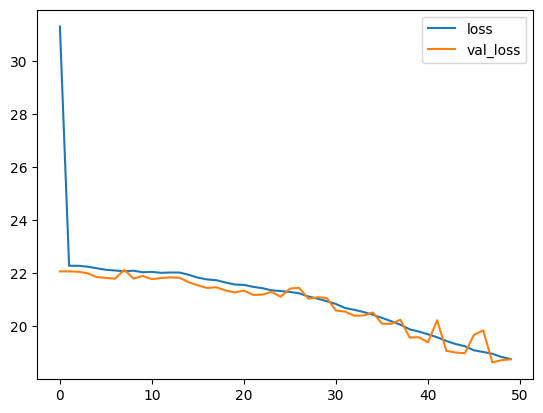

In [63]:
Model_losses=pd.DataFrame(model.history.history)
Model_losses.plot()

In [64]:
prediction=model.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_test,prediction)


476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


19.247353988172726

In [65]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

# Create LabelEncoders for each categorical feature
venue_Encode = LabelEncoder()
bat_team_Encode = LabelEncoder()
bowl_team_Encode = LabelEncoder()
batsman_Encode = LabelEncoder()
bowler_Encode = LabelEncoder()  # Assuming you need one for bowlers too

# Fit the encoders to your data (e.g., using new_data)
venue_Encode.fit(new_data['venue'])
bat_team_Encode.fit(new_data['bat_team'])
bowl_team_Encode.fit(new_data['bowl_team'])
batsman_Encode.fit(new_data['batsman'])
bowler_Encode.fit(new_data['bowler'])

# Create dropdown widgets
venue = widgets.Dropdown(options=new_data['venue'].unique().tolist(), description='select venue')
bat_team = widgets.Dropdown(options=new_data['bat_team'].unique().tolist(), description='select bat_team')
bowl_team = widgets.Dropdown(options=new_data['bowl_team'].unique().tolist(), description='select bowl_team')
batsman = widgets.Dropdown(options=new_data['batsman'].unique().tolist(), description='select batsman')
bowler = widgets.Dropdown(options=new_data['bowler'].unique().tolist(), description='select bowler')
btn = widgets.Button(description='predict')

def predict(b):
    with output:
        clear_output()

        try:
            decoded_venue = venue_Encode.transform([venue.value])[0]
            decoded_bat_team = bat_team_Encode.transform([bat_team.value])[0]
            decoded_bowl_team = bowl_team_Encode.transform([bowl_team.value])[0]
            decoded_batsman = batsman_Encode.transform([batsman.value])[0]
            decoded_bowler = bowler_Encode.transform([bowler.value])[0]

            # Prepare input data for prediction
            input_data = np.array([decoded_venue, decoded_bat_team, decoded_bowl_team, decoded_batsman, decoded_bowler])
            input_data = input_data.reshape(1, 5)
            input_data = scaler.transform(input_data)

            # Make prediction
            predicted_score = model.predict(input_data)
            predicted_score = int(predicted_score[0, 0])
            print("Predicted Score:", predicted_score)

        except ValueError as e:
            print(f"Error: {e}. Please make sure all selected values are valid.")

# Display widgets and link to predict function
output = widgets.Output()
display(venue, bat_team, bowl_team, batsman, bowler, btn, output)
btn.on_click(predict)

Dropdown(description='select venue', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mo…

Dropdown(description='select bat_team', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Ro…

Dropdown(description='select bowl_team', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Dar…

Dropdown(description='select batsman', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moham…

Dropdown(description='select bowler', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL …

Button(description='predict', style=ButtonStyle())

Output()